In [2]:
# modulos para analizar los datos
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
#armar colormap para agua y tierra
c_agua=plt.cm.Blues_r(np.linspace(0,0.75,256))
c_terr=plt.cm.Greens_r(np.linspace(0,0.75,256))
cols = np.vstack((c_agua, c_terr))
cmap=cm.colors.LinearSegmentedColormap.from_list("q", cols)

In [35]:
#archivo nc (grd) a cargar
nc_file=r"Z:\00 Memoria\Tareas\tarea02\HySea\bat_l4_vinavalpo_conf1.grd"

# ver contenidos archivo nc (grd)
data_nc=xr.open_dataset(nc_file)

with data_nc as ds:
  print(ds.keys()) # muestra contenido del archivo .grd

KeysView(<xarray.Dataset>
Dimensions:  (x: 1776, y: 752)
Coordinates:
  * x        (x) float64 288.4 288.4 288.4 288.4 ... 288.5 288.5 288.5 288.5
  * y        (y) float64 -33.05 -33.05 -33.05 -33.05 ... -33.0 -33.0 -33.0 -33.0
Data variables:
    z        (y, x) float64 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        bat_l4_vinavalpo_conf1.grd
    history:      File written by MATLAB function grdwrite2.m
    description:  Created 15-May-2018 11:14:39
    GMT_version:  4.x)


In [54]:
x_mareografo, y_mareografo=288.3722,-33.02778

z_boya=data_nc.z.sel(x=x_mareografo,y=y_mareografo,method="nearest").values.item()
z_boya

-4.497575412186732

-4.497575412186732


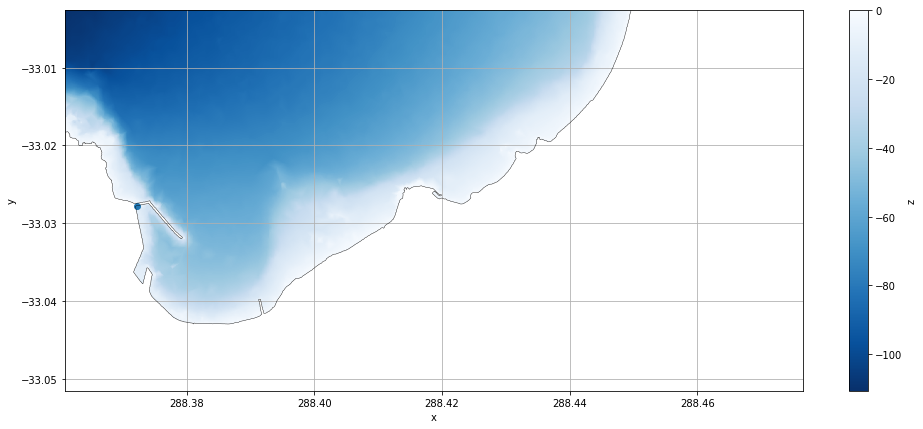

In [55]:
#Plotear batimetria
variable=data_nc.z.where(data_nc.z<=0)

#divnorm = cm.colors.DivergingNorm(vmin=data_nc.deformed_bathy.min(), vcenter=0, vmax=data_nc.deformed_bathy.max())

variable.plot.imshow(aspect=ds.dims['x'] / ds.dims['y'],size=7,cmap='Blues_r')
                          #,cmap=cmap,norm=divnorm)   #variable de interes
data_nc.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.4) #curva de nivel 0 y 200m
plt.scatter(x_mareografo,y_mareografo)

plt.grid()

#plt.savefig(nombre_archivo+'_'+nombre_variable+'.png',dpi=300) !!!!Falta arreglar nonmbre de archivo

print(z_boya)

In [7]:
inf_izq=[282.21985,-45.36212]
sup_der=[290.77505,-14.99956]

muestra=data_nc.where(((data_nc.x > inf_izq[0]) & (data_nc.x < sup_der[0])&
                       (data_nc.y > inf_izq[1]) & (data_nc.y < sup_der[1])),drop=True)

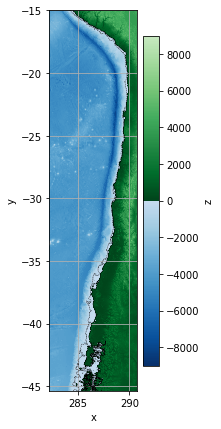

In [9]:
muestra.z.plot.imshow(aspect=muestra.dims['x'] / muestra.dims['y'],size=7,cmap=cmap)
muestra.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.4) #curva de nivel 0 y 200m
plt.grid()

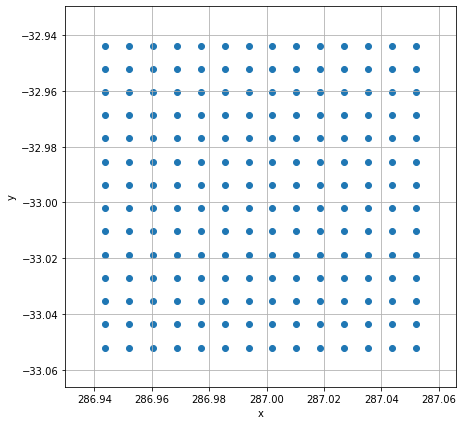

In [10]:
#verificar

punto=[287,-33]
d=0.06

muestra=data_nc.where(((data_nc.x > punto[0]-d) & (data_nc.x < punto[0]+d)
                       &(data_nc.y > punto[1]-d)&(data_nc.y < punto[1]+d)),drop=True)

muestra.plot.scatter(x='x',y='y',aspect=muestra.dims['x'] / muestra.dims['y'],size=7)
plt.grid()